## Retail Analysis with Walmart Data

### Import required packages

In [1]:
import pandas as pd

### Read the CSV file Walmart_Store_sales.csv as a Dataframe for working

In [2]:
wal = pd.read_csv(r"C:\1577429980_walmart_store_sales\Walmart_Store_sales.csv")

In [3]:
print(f"Shape of the data is {wal.shape} & size of the data is {wal.size}")

Shape of the data is (6435, 8) & size of the data is 51480


### Q1. Which store has maximum sales ?

In [4]:
store_group = wal.groupby('Store').agg({'Weekly_Sales': 'sum'})

In [5]:
store_group[store_group.Weekly_Sales == store_group.Weekly_Sales.max()]

,Weekly_Sales
Store,
20,3.013978e+08


### Q1: ANS: Store 20 has maximum sales of 3.013978e+08 as per the data


### Q2.1. Which store has the maximum Standard Deviation ?

In [6]:
store_group_std = wal.groupby('Store').agg({'Weekly_Sales': 'std'})

In [7]:
store_group_std[store_group_std.Weekly_Sales == store_group_std.Weekly_Sales.max()]

,Weekly_Sales
Store,
14,317569.949476


### Q2.1: ANS: Store 14 has maximum Standard Deviation of 317569.949476 as per the data

### Q2.2. What is the Coefficient of mean to standard deviation ?

In [8]:
mean_value = wal.Weekly_Sales.mean()
std_value = wal.Weekly_Sales.std()

coefficient_1 = std_value/mean_value
coefficient = mean_value/std_value

round(coefficient, 2)

1.86

### Q2.2: ANS: Coefficient of mean to standard deviation is 1.86 as per the data

### Q3. Which store/s has good quality growth rate in Q3'2012 ?

In [10]:
from datetime import datetime
wal.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [11]:
wal.shape

(6435, 8)

In [12]:
type(wal.iloc[0,1])

str

In [13]:
# Convert 'str' to datetime
def convert_datetime(x):
    return datetime.strptime(x,"%d-%m-%Y")

In [14]:
wal['Date'] = wal.Date.apply(convert_datetime)

In [15]:
def filter_date_q3(x):
    if x.month > 8 and x.year == 2012:
        return True
    else:
        return False

In [16]:
def filter_date_q2(x):
    if x.month <= 8 and x.month > 4 and x.year == 2012:
        return True
    else:
        return False

In [17]:
# Get average sales of Q2 & Q3
grouped_Q3 = wal[wal.Date.apply(filter_date_q3)].groupby(['Store']).agg({'Weekly_Sales': 'mean'})
grouped_Q2 = wal[wal.Date.apply(filter_date_q2)].groupby(['Store']).agg({'Weekly_Sales': 'mean'})

# Substract average growth of each store with Q2 and Q3
df1 = (grouped_Q3 - grouped_Q2)

# Get the max store growth rate
df1[df1.Weekly_Sales == df1.Weekly_Sales.max()]

,Weekly_Sales
Store,
17,62248.312639


### Q3: ANS: Store 17 has growth rate of 62248.312639 as per the data


### Q4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together ?


In [18]:
# Mean sales for non-holiday season for all stores
mean_non_season_non_holiday_sales = wal[wal.Holiday_Flag == 0].agg({'Weekly_Sales': 'mean'})
mean_non_season_non_holiday_sales

Weekly_Sales    1.041256e+06
dtype: float64

In [19]:
# Function to find holidays which have higher sales than the mean sales
def more_sales_check(x):
    if x > mean_non_season_non_holiday_sales[0]:
        return True
    else:
        return False


In [20]:
# Get the holiday weeks which have higher sales than the non-holiday weeks
holidays_week_of_higher_sales = wal[wal.Holiday_Flag == 1].loc[wal.Weekly_Sales.apply(more_sales_check)]
holidays_week_of_higher_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,2012-02-10,1238844.56,1,22.00,3.103,196.919506,6.589
5855,41,2012-09-07,1392143.82,1,67.41,3.596,198.095048,6.432
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724


In [21]:
holidays_week_of_higher_sales.set_index('Store', inplace=True)

In [22]:
holidays_week_of_higher_sales

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...
41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759
41,2012-02-10,1238844.56,1,22.00,3.103,196.919506,6.589
41,2012-09-07,1392143.82,1,67.41,3.596,198.095048,6.432


In [23]:
# Total holiday weeks
holidays_week_of_higher_sales[['Date']]

,Date
Store,
1,2010-02-12
1,2010-09-10
1,2010-11-26
1,2010-12-31
1,2011-02-11
...,...
41,2011-12-30
41,2012-02-10
41,2012-09-07


### Q4: ANS: Some holidays have a negative impack on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together: Above list of 220 have weekely sales higher then average sales of non holiday season.


### Q5. Provide monthly and semester view of sales in unit and give insights ?

In [24]:
# Use Date column to amke new columns for Day, Month and Year for future prediction
wal['Days'] = wal.Date.apply(lambda x: x.day)
wal['Months'] = wal.Date.apply(lambda x: x.month)
wal['Years'] = wal.Date.apply(lambda x: x.year)
wal['Days'] = wal.Date.apply(lambda x: x.weekday())

wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Years
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [25]:
# Find their total sales as group by each store on monthly basis
store_group_yearly = wal.groupby('Years').agg({'Weekly_Sales': 'sum'})
store_group_yearly

,Weekly_Sales
Years,
2010,2.288886e+09
2011,2.448200e+09
2012,2.000133e+09


In [26]:
# Find their total sales as group by each store on monthly basis
store_group_monthly = wal.groupby('Months').agg({'Weekly_Sales': 'sum'})
store_group_monthly

,Weekly_Sales
Months,
1,3.325984e+08
2,5.687279e+08
3,5.927859e+08
4,6.468598e+08
5,5.571256e+08
6,6.226299e+08
7,6.500010e+08
8,6.130902e+08
9,5.787612e+08


### Q6. Stastical Model for Store 1 Build prediction models to forcast demand
Q6.1. - Linear Regression - Utilize variables like data and restructure dates as 1 or 5 Feb 2020 (starting for the earliest dates in order). Hypothesize if CPI, Unemployment, and fuel have any impact on sales.

In [28]:
# Store 1 Dataframe be as below
wal_store1 = wal.loc[wal['Store'] == 1]
wal_store1.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Years
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [29]:
wal_store1.shape

(143, 11)

In [30]:
import datetime
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

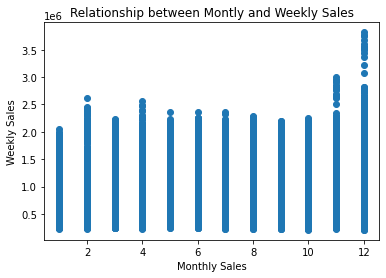

In [31]:
# Creating stastical model
plt.scatter(wal.Months, wal.Weekly_Sales)
plt.title("Relationship between Montly and Weekly Sales")
plt.xlabel("Monthly Sales")
plt.ylabel("Weekly Sales")
plt.show()

# END
